# Capstone  
**Author:** Sundus Yawar  
**Sprint:** 2  
**Student ID:** 583854  
**Institute:** BrainStation  
**Capstone Supervisor:** Amir Rahimizadeh

# Table of Contents:
[Overview](#Overview) 
- [Data Dictionary for Fuel Consumption Rating Data](#Data-dictionary-for-Fuel-consumption-Rating-Data)  
  
[Verifying Input File is Clean](#Verifying-Input-File-is-Clean)  
[Extended EDA](#Extended-EDA)
- [CO2 Rating by Vehicle Class](#CO2-Rating-by-Vehicle-Class)
- [Smog Rating by Vehicle Class](#Smog-Rating-by-Vehicle-Class)
- [Fuel Consumption(Combined) by Vehicle Class](#Fuel-Consumption-by-Vehicle-Class)  
  
[Feature Selection and Engineering](#Feature-Selection-and-Engineering)
- [Chi2 test for Model and Vehicle_Class](#Chi2-test-for-Model-and-Vehicle_Class)
- [VIF Analysis for Highly Correlated Numeric Columns](#VIF-Analysis-for-Highly-Correlated-Numeric-Columns)  
  
[Creating a Baseline model](#Creating-a-Baseline-model)
- [Evaluation Metrics](#Evaluation-Metrics)
- [Scaling the Data and Performing Onehotencoding](#Scaling-the-data-and-performing-onehotencoding)
- [Finding Optimal n_clusters for KMeans Baseline Model](#Finding-Optimal-n_clusters-for-KMeans-Baseline-Model)
    - [Visualizing Score for Inertia](#Visualizing-Score-for-Inertia)
    - [Visualizing Silhouette Score](#Visualizing-Silhouette-Score)
- [Final Baseline KMeans Model](#Final-Baseline-KMeans-Model)  
    - [Visualizing the Clusters](#Visualizing-the-Clusters)
  
[Post-processing](#Post-processing)
- [Undoing OneHotEncoding](#Undoing-OneHotEncoding)
- [Determining Vehicle Classes in each Kmeans Cluster](#Determining-Vehicle-Classes-in-each-Kmeans-Cluster)
- [Determining Min/Max Values for Fuel Consumption, CO2 Emissions, and Smog Rating by Cluster](#Determining-Min/Max-Values-for-Fuel-Consumption,-CO2-Emissions,-and-Smog-Rating-by-Cluster)
    - [Visualizing Results](#Visualizing-Results)

# Overview
Since I have done a lot of EDA in sprint 1, in this sprint I am mainly focussed on feature selection and engineering and creating a baseline unsupervised learning model to create clusters. Also, even though I gathered price dataset from multiple sources for the sprint 1 to add to the fuel consumption dataset, it only filled a few 100 rows of data while this data set has 6,951 rows. So, there are still a lot of missing values for the price. So, I will work on that till sprint 3. Due to this I imported the cleaned data from sprint 1 without the price column. But it shouldn't affect the clustering because whether a car is green or not does not depend on price. Specially when prices are different for older years like 2017-2022. So, price won't help in this regard anyways.  

## Data dictionary for Fuel consumption Rating Data

**Data Dictionary for model:**  
    
| Acronym  | Definition             |
|:----------|:------------------------|
| 4WD/4X4  | Four-wheel drive       |
| AWD      | All-wheel drive        |
| FFV      | Flexible-fuel vehicle  |
| SWB      | Short wheelbase        |
| LWB      | Long wheelbase         |
| EWB      | Extended wheelbase     |  

**Data Dictionary for transmission:**  
| Acronym | Definition                |
|:---------|:---------------------------|
| A       | Automatic                 |
| AM      | Automated manual          |
| AS      | Automatic with select shift |
| AV      | Continuously variable     |
| M       | Manual                    |
| 3 – 10  | Number of gears           |    
  
**Data Dictionary for fuel type:**   

| Code | Fuel Type           |
|:------|:---------------------|
| X    | Regular gasoline   |
| Z    | Premium gasoline   |
| D    | Diesel              |
| E    | Ethanol (E85)      |
| N    | Natural gas         |  
  
  
| Attribute         | Description                                                                             |
|:------------------|:----------------------------------------------------------------------------------------|
| Fuel Consumption  | City and highway fuel consumption ratings are shown in L/100 km and in mpg.           |
| CO2 Emissions     | Tailpipe emissions of carbon dioxide (g/km) for combined city and highway driving.     |
| CO2 Rating        | CO2 emissions rating on a scale from 1 (worst) to 10 (best).                             |
| Smog Rating       | Smog-forming pollutants emissions rating on a scale from 1 (worst) to 10 (best).        |


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
fuel_cons_rating = pd.read_csv("Fuel_cons_rating_clean_merged.csv")

In [3]:
fuel_cons_rating.shape

(6951, 15)

# Verifying Input File is Clean
Just confirming that the imported file is the one I cleaned in previous sprint.

In [4]:
fuel_cons_rating['Make'].nunique()

40

In [5]:
sorted(fuel_cons_rating['Make'].unique())

['ACURA',
 'ALFA ROMEO',
 'ASTON MARTIN',
 'AUDI',
 'BENTLEY',
 'BMW',
 'BUGATTI',
 'BUICK',
 'CADILLAC',
 'CHEVROLET',
 'CHRYSLER',
 'DODGE',
 'FIAT',
 'FORD',
 'GENESIS',
 'GMC',
 'HONDA',
 'HYUNDAI',
 'INFINITI',
 'JAGUAR',
 'JEEP',
 'KIA',
 'LAMBORGHINI',
 'LAND ROVER',
 'LEXUS',
 'LINCOLN',
 'MASERATI',
 'MAZDA',
 'MERCEDES-BENZ',
 'MINI',
 'MITSUBISHI',
 'NISSAN',
 'PORSCHE',
 'RAM',
 'ROLLS-ROYCE',
 'SMART',
 'SUBARU',
 'TOYOTA',
 'VOLKSWAGEN',
 'VOLVO']

In [6]:
fuel_cons_rating['Vehicle_Class'].nunique()

15

In [7]:
sorted(fuel_cons_rating['Vehicle_Class'].unique())

['COMPACT',
 'FULL-SIZE',
 'MID-SIZE',
 'MINICOMPACT',
 'MINIVAN',
 'PICKUP TRUCK - SMALL',
 'PICKUP TRUCK - STANDARD',
 'SPECIAL PURPOSE VEHICLE',
 'STATION WAGON - MID-SIZE',
 'STATION WAGON - SMALL',
 'SUBCOMPACT',
 'SUV - SMALL',
 'SUV - STANDARD',
 'TWO-SEATER',
 'VAN - PASSENGER']

In [8]:
fuel_cons_rating['Transmission'].nunique()

26

In [9]:
sorted(fuel_cons_rating['Transmission'].unique())

['A10',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'AM6',
 'AM7',
 'AM8',
 'AM9',
 'AS10',
 'AS5',
 'AS6',
 'AS7',
 'AS8',
 'AS9',
 'AV',
 'AV1',
 'AV10',
 'AV6',
 'AV7',
 'AV8',
 'M5',
 'M6',
 'M7']

In [10]:
fuel_cons_rating['Fuel_Type'].nunique()

4

In [11]:
sorted(fuel_cons_rating['Fuel_Type'].unique())

['D', 'E', 'X', 'Z']

In [12]:
fuel_cons_rating.head()

,Unnamed: 0,Model_Year,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption-City(L/100 km),Fuel_Consumption-Hwy(L/100 km),Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),CO2_Rating,Smog_Rating
0,0,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,192,7,6
1,1,2017,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,259,4,6
2,2,2017,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,251,5,6
3,3,2017,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,210,6,6
4,4,2017,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,261,4,6


In [13]:
fuel_cons_rating.drop("Unnamed: 0", axis=1, inplace=True)

In [14]:
fuel_cons_rating.head()


,Model_Year,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption-City(L/100 km),Fuel_Consumption-Hwy(L/100 km),Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),CO2_Rating,Smog_Rating
0,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,192,7,6
1,2017,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,259,4,6
2,2017,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,251,5,6
3,2017,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,210,6,6
4,2017,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,261,4,6


In [15]:
#Just want to make sure this file has data from all years
fuel_cons_rating['Model_Year'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

# Extended EDA
I had done thorough EDA in sprint 1, like box plots for fuel consumption, co2 and smog rating by vehicle class and make.  
In this EDA, I am just improving my visualization.  
The methodology for these caluclations were explained in sprint 1, however, in this sprint I am just creating a better visualization for it based on the feedback received on sprint 1. The feedback I received was to show visualization for the ranking rather than just showing table in the output for ranking.

## CO2 Rating by Vehicle Class

In [16]:
summary_stats = fuel_cons_rating.groupby('Vehicle_Class')['CO2_Rating'].describe()
# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

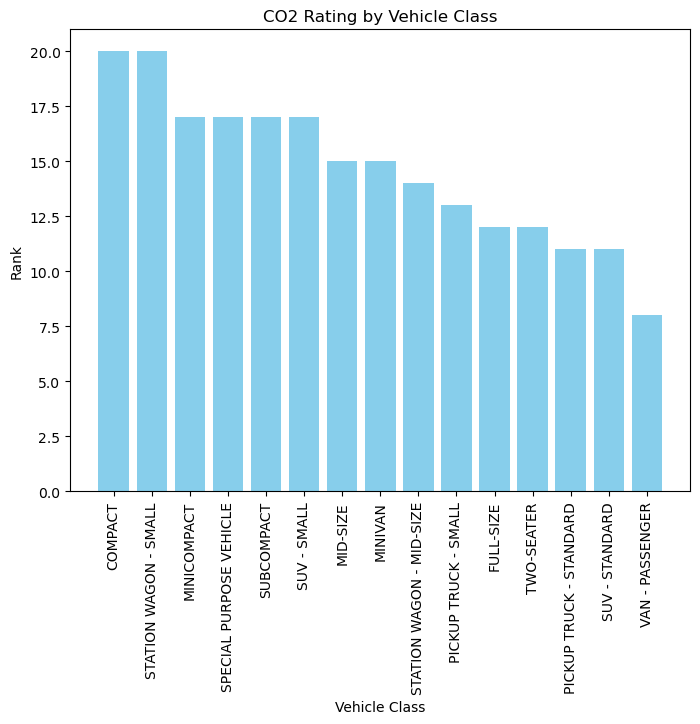

In [17]:
weights = {'median': 2, '75%': 2, 'IQR': 3}
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['75%'] * weights['75%'] -
    summary_stats['IQR'] * weights['IQR']
)
summary_stats.sort_values(by='rank', ascending=False, inplace=True)
plt.figure(figsize=(8, 6)) 
plt.bar(summary_stats.index, summary_stats['rank'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Class')
plt.ylabel('Rank')
plt.title('CO2 Rating by Vehicle Class')
plt.show()

## Smog Rating by Vehicle Class

In [18]:
summary_stats = fuel_cons_rating.groupby('Vehicle_Class')['Smog_Rating'].describe()
# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

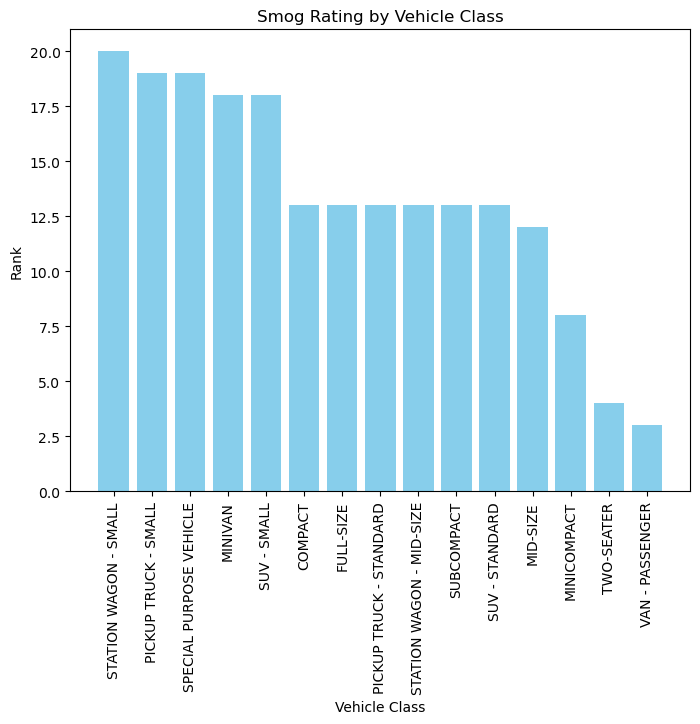

In [19]:
weights = {'median': 2, '75%': 2, 'IQR': 3}
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['75%'] * weights['75%'] -
    summary_stats['IQR'] * weights['IQR']
)
summary_stats.sort_values(by='rank', ascending=False, inplace=True)
plt.figure(figsize=(8, 6)) 
plt.bar(summary_stats.index, summary_stats['rank'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Class')
plt.ylabel('Rank')
plt.title('Smog Rating by Vehicle Class')
plt.show()

## Fuel Consumption by Vehicle Class

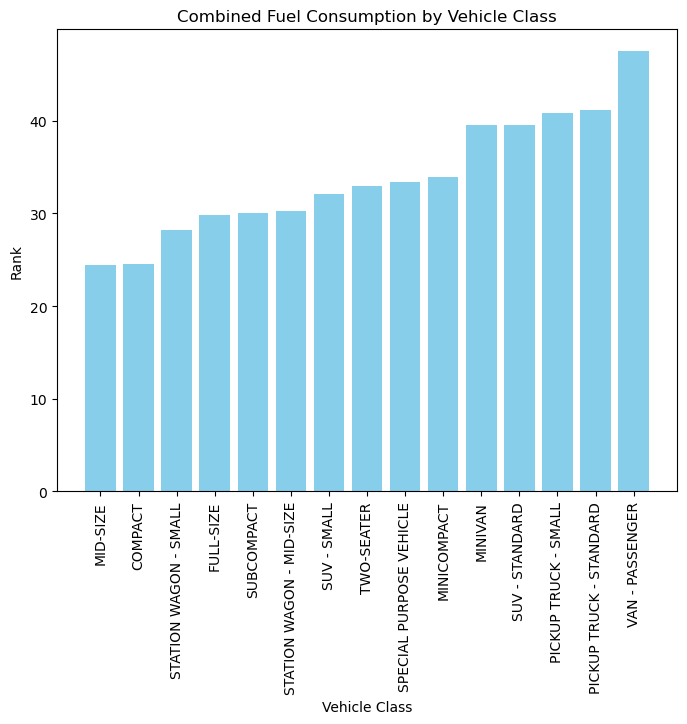

In [20]:
summary_stats = fuel_cons_rating.groupby('Vehicle_Class')['Fuel_Consumption-Comb(L/100 km)'].describe()
# Calculate IQR and add it to the summary_stats DataFrame
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Calculation for weighted ranking
weights = {'median': 2, '25%': 2, 'IQR': 3}
summary_stats['rank'] = (
    summary_stats['50%'] * weights['median'] +
    summary_stats['25%'] * weights['25%'] -
    summary_stats['IQR'] * weights['IQR']
)

summary_stats.sort_values(by='rank', ascending=True, inplace=True)
plt.figure(figsize=(8, 6)) 
plt.bar(summary_stats.index, summary_stats['rank'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Class')
plt.ylabel('Rank')
plt.title('Combined Fuel Consumption by Vehicle Class')
plt.show()


# Feature Selection and Engineering
**For recap from sprint 1:**

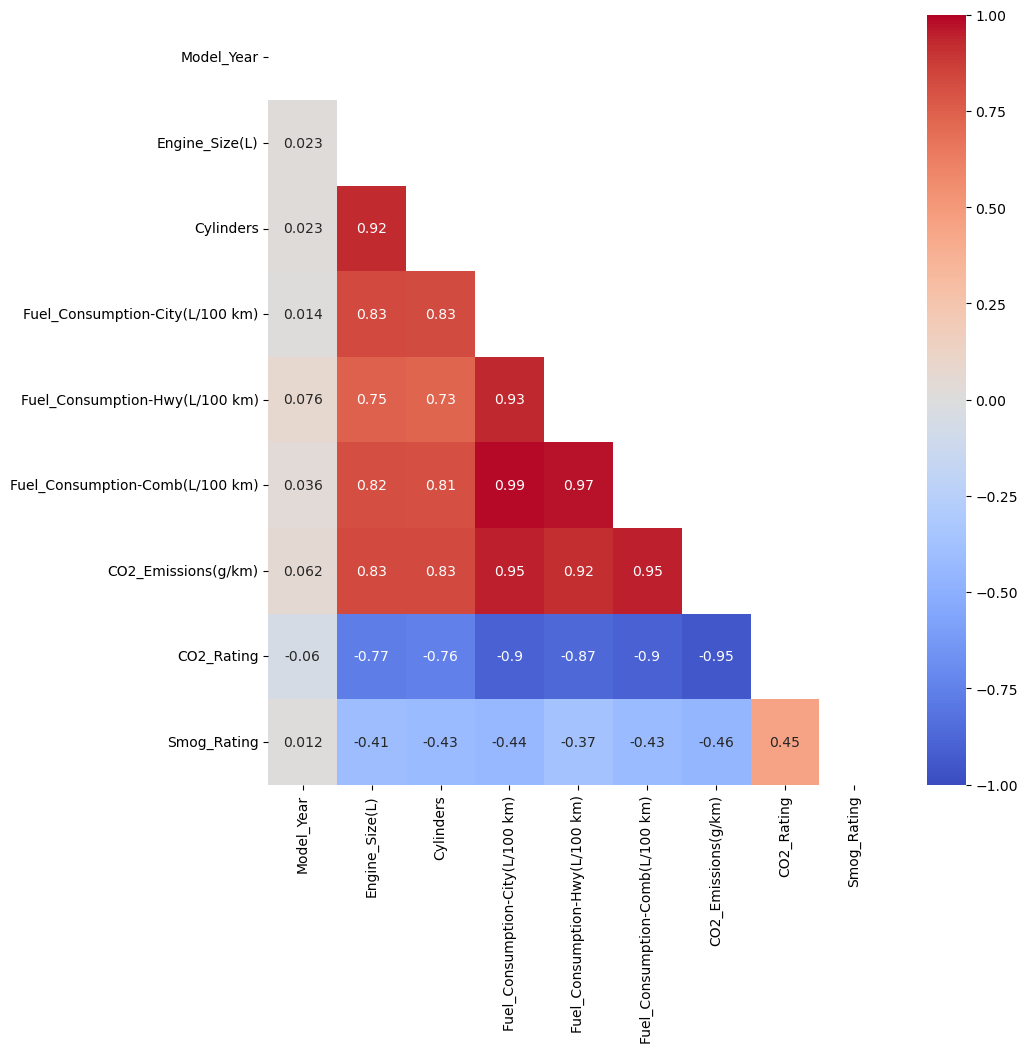

In [21]:
# caclculate all the correlations between each independent variable
corr_df = fuel_cons_rating.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.round(5), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In the first sprint, I did correlation matrix that showed high collinearity between these columns because Fuel_consumption city and highway is same as the combined and the combined in mpg is same as combine(L/100 km). That's why dropping these columns.

In [22]:
fuel_cons_rating.drop(columns=["Fuel_Consumption-City(L/100 km)", "Fuel_Consumption-Hwy(L/100 km)"], inplace=True)
fuel_cons_rating.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),CO2_Rating,Smog_Rating
0,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,8.2,192,7,6
1,2017,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,11.0,259,4,6
2,2017,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,10.7,251,5,6
3,2017,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.0,210,6,6
4,2017,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.0,261,4,6


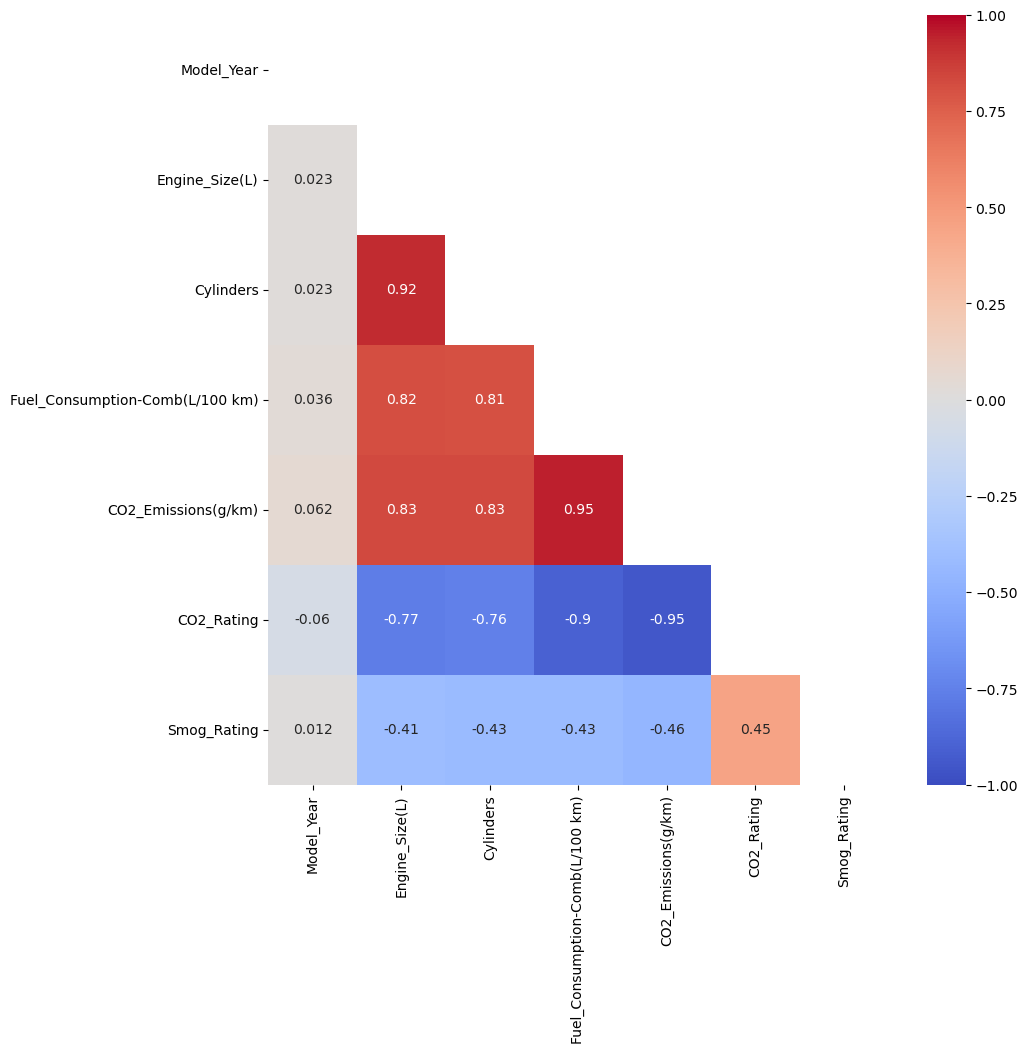

In [23]:
# caclculate all the correlations between each independent variable
corr_df = fuel_cons_rating.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.round(5), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.show()

Now, what I am not so sure about is whether collinearity exists between Fuel_Consumption-Comb and (Engine_Size and Cylinders). For this I'll need to do advanced EDA like

In [24]:
fuel_cons_rating.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),CO2_Rating,Smog_Rating
0,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,8.2,192,7,6
1,2017,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,11.0,259,4,6
2,2017,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,10.7,251,5,6
3,2017,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.0,210,6,6
4,2017,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.0,261,4,6


## Chi2 test for Model and Vehicle_Class
**Determining relationship between Model and Vehicle Class**  
So, I think that for clustering I may not need to include Model column because model is similar to Vehicle_Class. Because model classifies a vehicle as an SUV or sedan. For example, Acura TLX is a sedan but ACURA RDX is a SUV. But I just want to prove this statistically via chi2 test.  
**Null Hypothesis:** Model and Vehicle_Class features are independent of one another  
**Alternate Hypothesis:** The 2 features are dependent on one another

In [25]:
from scipy.stats import chi2_contingency

In [26]:
# Creating the contingency table
contingency_table = pd.crosstab(fuel_cons_rating['Model'], fuel_cons_rating['Vehicle_Class'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2: ",chi2," P-value: ",p)

chi2:  95628.8749151633  P-value:  0.0


In [27]:
print( "{:.2e}".format(p))

0.00e+00


Initially, I thought that it printed the rounded value so I re-formatted the p-value to get it in scientific notation and it turns out the p-value is exactly 0 indeed. And since p-value is less than 0.05 therefore, I can reject the null hypothesis. This means that Model and Vehicle_Class are dependent on one another and one of the columns can be dropped for feature selection. 
For this very reason I'll be dropping the model column because I don't care about clusters to be created based on Model. I care about clusters to be created based on Vehicle class. Now I have a few reasons for wanting it this way:  
- Model has a lot more unique values than vehicle class clusters will be complicated as it will result in a lot of clusters
- Creating clusters by model is not as useful and it will take a lot more computational power than creating clusters by Vehicle class
- Creating clusters based on Vehicle_Class is a lot more useful because what's considered green or not green heavily depends on the type of vehicle. For example, what's considered fuel efficient for an SUV will be considered as inefficient for a sedan. Because one is a heavier and larger vehicle than the other. And this is the kind of information I want.

In [28]:
# Dropping the model column
fuel_cons_rating.drop('Model', axis=1, inplace=True)

In [29]:
fuel_cons_rating.columns

Index(['Model_Year', 'Make', 'Vehicle_Class', 'Engine_Size(L)', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption-Comb(L/100 km)',
       'CO2_Emissions(g/km)', 'CO2_Rating', 'Smog_Rating'],
      dtype='object')

## VIF Analysis for Highly Correlated Numeric Columns
**Determining Relationship between CO2_emissions, CO2_rating, Fuel_consumption, Engine_size and Cylinders**  
Now, I am interested in exploring the relationship between CO2_emissions, CO2_rating, Fuel_consumption, engine_size and cylinders. Now based on my domain knowledge, I know that fuel_consumption and co2 emissions are related because the more fuel a car consumes the more CO2 it produces as a byproduct. But CO2 emissions aren't just based on Fuel_consumption it is also based on type of fuel being used. For example, diesel produces more CO2 as a byproduct than gasoline. Transmission also affects a vehicles fuel consumption. Engine size and cylinders definitely affects fuel consumption more directly. And since my main objective is to determine whether a car of specific type is green or not, and fuel_consumption, co2_emissions and smog ratings are good indicators of this I think I can drop CO2 rating, engine size and cylinders column. But I'd like to perform VIF analysis to ensure that it is right to do so. I chose VIF analysis for this because these 4 columns have high correlation values and indicate multicollinearity.

In [30]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
# Filtering the relevant columns for VIF analysis
filtered_cols_for_vif = fuel_cons_rating[['Fuel_Consumption-Comb(L/100 km)', 'CO2_Emissions(g/km)','CO2_Rating','Engine_Size(L)','Cylinders']]

In [32]:
# Instantiate
f_c_vif_withconstant = sm.add_constant(filtered_cols_for_vif)

In [33]:
# Run VIF
variance_inflation_factor(f_c_vif_withconstant, 1)

10.867170586499027

In [34]:
# Checking VIF for each column
pd.Series([variance_inflation_factor(f_c_vif_withconstant, i)
         for i in range(f_c_vif_withconstant.shape[1])],
         index = f_c_vif_withconstant.columns)[1:] # leaving out the constant

Fuel_Consumption-Comb(L/100 km)    10.867171
CO2_Emissions(g/km)                21.525189
CO2_Rating                         10.052957
Engine_Size(L)                      7.572952
Cylinders                           7.569772
dtype: float64

I'd like to retry by dropping CO2_Rating, because I actually think CO2_emissions is a much more important indicator about whether a vehicle is green or not compared to just a rating.

In [35]:
filtered_cols_for_vif.drop('CO2_Rating', axis=1, inplace=True)
# Instantiate
f_c_vif_withconstant = sm.add_constant(filtered_cols_for_vif)
# Run VIF
variance_inflation_factor(f_c_vif_withconstant, 1)

C:\Users\Sundus Yawar\AppData\Local\Temp\ipykernel_35492\233973113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cols_for_vif.drop('CO2_Rating', axis=1, inplace=True)


10.848704680661406

In [36]:
# Checking VIF for each column
pd.Series([variance_inflation_factor(f_c_vif_withconstant, i)
         for i in range(f_c_vif_withconstant.shape[1])],
         index = f_c_vif_withconstant.columns)[1:] # leaving out the constant

Fuel_Consumption-Comb(L/100 km)    10.848705
CO2_Emissions(g/km)                11.967490
Engine_Size(L)                      7.543148
Cylinders                           7.380223
dtype: float64

Although, from the VIF score it doesn't suggest Engine_Size and Cylinders to be a major problem for multicollinearity, I would rather drop these 2 columns than Fuel_consumption and CO2_emissions. Because I need to look at what my main objective is rather than just VIF score. My Main objective is to determine whether a vehible is green or not. And Engine sixe and cylinder doesnt give me a proper indication of that but Fuel consumption and CO2 emissions do. So, I'll run the VIF analysis again by removing Engine size and cylinders. See this is why domain knowledge and statistical analysis both are very important. Both should be used in unison rather than on their own.

In [37]:
filtered_cols_for_vif.drop(['Engine_Size(L)', 'Cylinders'], axis=1, inplace=True)
# Instantiate
f_c_vif_withconstant = sm.add_constant(filtered_cols_for_vif)
# Run VIF
variance_inflation_factor(f_c_vif_withconstant, 1)

C:\Users\Sundus Yawar\AppData\Local\Temp\ipykernel_35492\3544826753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cols_for_vif.drop(['Engine_Size(L)', 'Cylinders'], axis=1, inplace=True)


10.539788822570832

In [38]:
# Checking VIF for each column
pd.Series([variance_inflation_factor(f_c_vif_withconstant, i)
         for i in range(f_c_vif_withconstant.shape[1])],
         index = f_c_vif_withconstant.columns)[1:] # leaving out the constant

Fuel_Consumption-Comb(L/100 km)    10.539789
CO2_Emissions(g/km)                10.539789
dtype: float64

As observed, the overall VIF score has gone down from 10.867 to 10.5398. Also, the individual VIF score for Fuel_Consumption-Comb has gone down from 10.867 to 10.5398 and individual VIF score for CO2_Emissions has gone down from 21.525 to 10.5398. Although, the VIF for individual columns Fuel_consumption_combined and CO2_emissions is still greater than 5, I won't drop either of these. My reason for this are as follows:  
- Although it may seem that CO2_emissions and fuel_consumption are same things it is not quite true. 
    - Because Fuel consumption is more affected by factors like number of cylinders, engine size, vehicle class, and transmission type.
    - CO2 emissions are affected by factors like year in which a vehicle was produced. For example, government of Canada placed more stringent rules on emissions starting 2017 which requires manufacturers to develop technologies that reduces CO2 emissions (see github for research doc). CO2 emissions are also affected by engine size, cylinder and vehicle class but they are affected by other things too like fuel type. For example diesel produces more CO2 emissions compared to gasoline. And all this is important consideration for whether a vehicle is green or not green. So, I won't be removing either of these. 
    - I need both columns for a comprehensive assessment of a vehicle to determine whether a vehicle is green or not. Because 1 speaks about the fuel efficiency of a vehicle which a factor in determining whether a vehicle is green or not and another speaks to its co2 emissions which depends on variety of factors.

In [39]:
fuel_cons_rating.drop(['Engine_Size(L)', 'Cylinders','CO2_Rating'], axis=1, inplace=True)

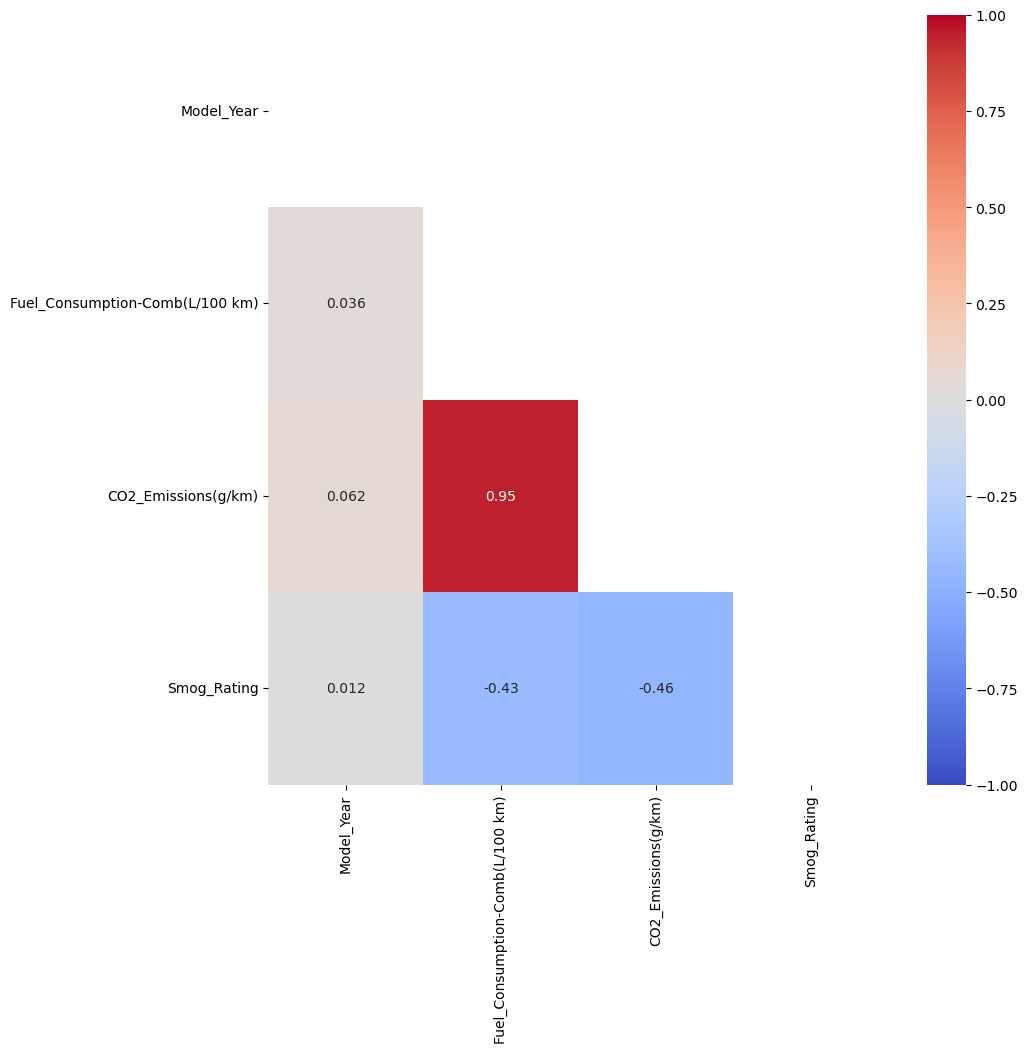

In [40]:
# Recalculating Correlations

# caclculate all the correlations between each independent variable
corr_df = fuel_cons_rating.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df.round(5), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.show()

This looks a lot better as there is only 1 column with high correlation, compared to previous feature selected where the correlation matrix was populated with extremely high correlations. And as explained earlier, although fuel_consumption_comb and CO2_emissions on surface look similar due to VIF score and correlation, I am keeping both based on domain knowledge on the type of information that the 2 convey. However, Perhaps in sprint 3 I can try backward feature selection and see whether having both yield better performance or dropping 1 of them would yield better performance.

In [41]:
fuel_cons_rating.columns

Index(['Model_Year', 'Make', 'Vehicle_Class', 'Transmission', 'Fuel_Type',
       'Fuel_Consumption-Comb(L/100 km)', 'CO2_Emissions(g/km)',
       'Smog_Rating'],
      dtype='object')

In [42]:
fuel_cons_rating.to_csv("Sprint2_featureSelection_result.csv")

I don't see any benefit of including transmission type as part of clustering for green vs not green vehicle. So, I'll drop this column too. This will reduce the dimensionality of the data by 26 columns after onehotencoding as there are 26 unique types for it. Also, most customers are aware of Make, model, vehicle class, and fuel type. Unless they are car geeks they don't really care much about transmission. And transmission does affect CO2_emissions and having CO2_emissions and fuel consumption columns is sufficient. 

# Creating a Baseline model
Although, Make, Model_Year, and Fuel type are also very important factors for determining whether a vehicle is green or not. For the baseline model I just want to do it based on vehicle class just as a very simple cluster to see what it can be like.
## Evaluation Metrics
Evaluation metrics for unsupervised learning models are inertia and silhouette.  
**Inertia** is the distance between the data points in a cluster from the center. The bigger the distance the poorer the cluster, the smaller the distance the better the cluster. Usually inertia decreases as the number of cluster increases but having a lot of clusters is not great either. Because we don't want 3 clusters for a cluster that could easily have been just 2 clusters. And hence it must be used in conjunction with the silhouette score.  
**Silhouette** score determines separation from other clusters. The bigger the separation the better the clusters.  
  
**For the baseline model**, I want to see if having 2 clusters is sufficient because I want to know whether the vehicles are green or not, or does it makes sense to cluster based on vehicle class i.e. 30 clusters as there are 15 vehicle classes and for each vehicle class I want to know whether they are green or not, so 15*2=30. The reason for this experimentation is to get a baseline idea about clustering with this logic. Because for the final model I will have additonal features like Make, Model_Year, and Fuel_Type in addition to the ones I chose for the baseline. And I want to come up with logical set of # of clusters to select for the final model. So, if my logic here is proven to be correct then the trial and error part for final one will be a lot more efficient as I won't be trying a bunch of random numbers but rather coming up with n_clusters values to try based on logic.  
  
**For current and future modelling** I won't be using dimensionality reduction techniques like PCA because it takes all features into 1 PCA (dimensions). Which will make it harder to interpret which category the green and not green vehicles belong to. 

In [585]:
df_for_clustering = (fuel_cons_rating.drop(['Model_Year','Make','Transmission','Fuel_Type'], axis=1, inplace=False)).copy()
df_for_clustering.head()

,Vehicle_Class,Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),Smog_Rating
0,COMPACT,8.2,192,6
1,SUV - SMALL,11.0,259,6
2,SUV - SMALL,10.7,251,6
3,SUV - SMALL,9.0,210,6
4,TWO-SEATER,11.0,261,6


## Scaling the data and performing onehotencoding
I am scaling the data since fuel consumption, co2 emissions have different value scales. 

In [586]:
from sklearn.preprocessing import StandardScaler

# Separating categorical and numerical columns 
categorical_columns = ['Vehicle_Class']
numerical_columns = ['Fuel_Consumption-Comb(L/100 km)', 'CO2_Emissions(g/km)', 'Smog_Rating']

# Instantiate
scaler = StandardScaler()
# Fit and Transform
df_for_clustering[numerical_columns] = scaler.fit_transform(df_for_clustering[numerical_columns])

df_for_clustering.head()

,Vehicle_Class,Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),Smog_Rating
0,COMPACT,-0.990427,-1.026786,0.698072
1,SUV - SMALL,0.010211,0.072781,0.698072
2,SUV - SMALL,-0.097001,-0.058511,0.698072
3,SUV - SMALL,-0.704531,-0.731380,0.698072
4,TWO-SEATER,0.010211,0.105604,0.698072


In [587]:
# Perform one-hot encoding on the "Vehicle_Class" column
df_for_clustering = pd.get_dummies(df_for_clustering, columns=['Vehicle_Class'], prefix=['VC_'])
df_for_clustering.head()

,Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),Smog_Rating,VC__COMPACT,VC__FULL-SIZE,VC__MID-SIZE,VC__MINICOMPACT,VC__MINIVAN,VC__PICKUP TRUCK - SMALL,VC__PICKUP TRUCK - STANDARD,VC__SPECIAL PURPOSE VEHICLE,VC__STATION WAGON - MID-SIZE,VC__STATION WAGON - SMALL,VC__SUBCOMPACT,VC__SUV - SMALL,VC__SUV - STANDARD,VC__TWO-SEATER,VC__VAN - PASSENGER
0,-0.990427,-1.026786,0.698072,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.010211,0.072781,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.097001,-0.058511,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-0.704531,-0.731380,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.010211,0.105604,0.698072,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Finding Optimal n_clusters for KMeans Baseline Model

In [588]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = [2,15,30,38,45,100]

sil_score = []
inertia_list = []

for k in ks:
    
    # Instantiate 
    
    kmeans = KMeans(n_clusters=k)
    
    # Fit
    
    y_labels = kmeans.fit_predict(df_for_clustering)
    
    
    # Append inertia and sil score
    
    inertia_list.append(kmeans.inertia_)
    
    sil_score.append(silhouette_score(df_for_clustering, y_labels))
    
    print(f'Running kmeans for k = {k}')

Running kmeans for k = 2
Running kmeans for k = 15
Running kmeans for k = 30
Running kmeans for k = 38
Running kmeans for k = 45
Running kmeans for k = 100


In [589]:
print("n_clusters: ",ks)
print("inertia: ",inertia_list)
print("silhouette score: ",sil_score)

n_clusters:  [2, 15, 30, 38, 45, 100]
inertia:  [16875.41119652722, 6808.035957623853, 4612.202653701919, 3857.9610302370947, 3399.256682616581, 1496.2138473021803]
silhouette score:  [0.3116904654817058, 0.22474672844710583, 0.3157021580030779, 0.35882669103704684, 0.3843831149998275, 0.47384539309565066]


### Visualizing Score for Inertia

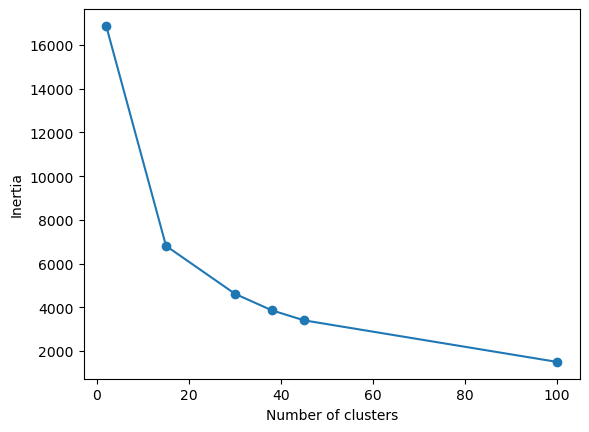

In [590]:
plt.figure()

plt.plot(ks, inertia_list, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

### Visualizing Silhouette Score

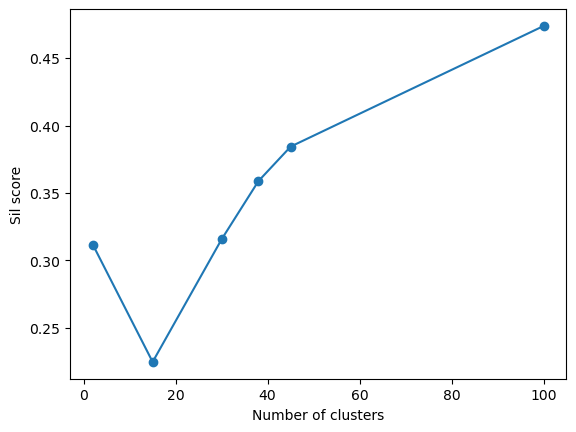

In [591]:
plt.figure()

plt.plot(ks, sil_score, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Sil score')

plt.show()

If I look at the results of inertia and silhouette it is obvious that a better choice for number of clusters is 100 because this k values leads to lower inertia and better separation of clusters from one another.  
Which makes sense because even though I only chose vehicle class and not other features like Model_Year, Make, Fuel_Type and transmission type, all these things affect the clusters because even though I didn't choose these features the data for Fuel_consumption, CO2_Emissions and Smog_Rating data reflects these features because it differs for each of those features.  
However, since I don't have other columns right now I am choosing 30 n clusters for final k-Means clustering algorithm for interpretability because it has higher silhouette score compared to 2 and 15 and may be more interpretable than values greater than 30 because we have 15 vehicle classes, and it could be clustered in a way to distinguish green or not green within those vehicle classes.

## Final Baseline KMeans Model

In [592]:
# Instantiate 
kmeans = KMeans(n_clusters=30)
    
# Fit   
y_labels = kmeans.fit_predict(df_for_clustering)

# New data frame to include clustering result
df_after_clustering = df_for_clustering.copy() 

# Storing the y_labels from the clustering
df_after_clustering['kmeans_labels'] = y_labels

df_after_clustering.head(25)

,Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),Smog_Rating,VC__COMPACT,VC__FULL-SIZE,VC__MID-SIZE,VC__MINICOMPACT,VC__MINIVAN,VC__PICKUP TRUCK - SMALL,VC__PICKUP TRUCK - STANDARD,VC__SPECIAL PURPOSE VEHICLE,VC__STATION WAGON - MID-SIZE,VC__STATION WAGON - SMALL,VC__SUBCOMPACT,VC__SUV - SMALL,VC__SUV - STANDARD,VC__TWO-SEATER,VC__VAN - PASSENGER,kmeans_labels
0,-0.990427,-1.026786,0.698072,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0.010211,0.072781,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22
2,-0.097001,-0.058511,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22
3,-0.704531,-0.731380,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14
4,0.010211,0.105604,0.698072,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,26
5,-0.097001,-0.074922,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22
6,-1.026165,-1.059609,1.816113,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,24
7,-0.954690,-0.944729,0.698072,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
8,-0.490108,-0.468797,0.698072,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
9,-0.918953,-0.944729,0.139051,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,26


In [593]:
df_for_clustering.shape

(6951, 18)

In [594]:
df_after_clustering.shape

(6951, 19)

### Visualizing the Clusters

In [595]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=1)
tsne_data = tsne.fit_transform(df_after_clustering.drop(['kmeans_labels'], axis=1))

tsne_kmeans_df = pd.DataFrame(tsne_data, columns=[f'D{i+1}' for i in range(3)])
tsne_kmeans_df['kmeans_labels'] = df_after_clustering['kmeans_labels'].values
tsne_kmeans_df.head(20)

C:\Users\Sundus Yawar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sundus Yawar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,D1,D2,D3,kmeans_labels
0,-17.008308,-1.588237,15.098631,9
1,4.827107,-8.475466,-9.994183,22
2,4.909619,-9.048698,-7.831688,22
3,-3.632413,-9.461481,-2.342115,14
4,9.351052,10.991706,15.435750,26
5,4.928845,-9.100617,-7.705688,22
6,-22.608076,-3.813385,1.135061,24
7,-17.016558,-1.301037,15.696713,9
8,-13.867561,1.269287,19.194597,9
9,6.104912,13.652391,15.785046,26


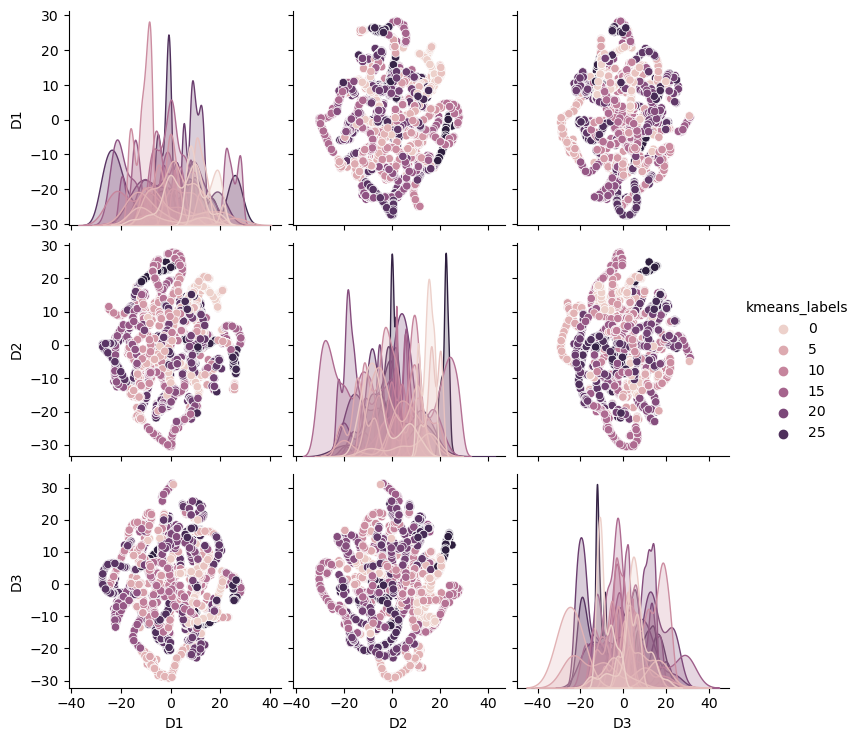

In [596]:
sns.pairplot(tsne_kmeans_df, hue='kmeans_labels')
plt.show()

# Post-processing
## Undoing OneHotEncoding
I just want to see what vehicle classes belong in certain clusters which is why I want to undo so to speak the onehotencoding in other words I want to recreate the Vehicle_Class columns

In [597]:
post_processing_df = df_after_clustering.copy()
def undo_one_hot_encoding(row):
    for col in post_processing_df.columns:
        # column with prefix VC__ with value of 1 be stored with column name without the prefix in vehicle_class column
        if col.startswith('VC__') and row[col] > 0:
            return col.replace('VC__', '')
    return ''
post_processing_df['Vehicle_Class'] = post_processing_df.apply(undo_one_hot_encoding, axis=1)
post_processing_df.head()

,Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),Smog_Rating,VC__COMPACT,VC__FULL-SIZE,VC__MID-SIZE,VC__MINICOMPACT,VC__MINIVAN,VC__PICKUP TRUCK - SMALL,VC__PICKUP TRUCK - STANDARD,VC__SPECIAL PURPOSE VEHICLE,VC__STATION WAGON - MID-SIZE,VC__STATION WAGON - SMALL,VC__SUBCOMPACT,VC__SUV - SMALL,VC__SUV - STANDARD,VC__TWO-SEATER,VC__VAN - PASSENGER,kmeans_labels,Vehicle_Class
0,-0.990427,-1.026786,0.698072,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,COMPACT
1,0.010211,0.072781,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,SUV - SMALL
2,-0.097001,-0.058511,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,SUV - SMALL
3,-0.704531,-0.731380,0.698072,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14,SUV - SMALL
4,0.010211,0.105604,0.698072,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,26,TWO-SEATER


In [598]:
# Keep only columns that don't start with VC__ prefix
post_processing_df = post_processing_df.loc[:, ~post_processing_df.columns.str.startswith('VC__')]
post_processing_df.head()

,Fuel_Consumption-Comb(L/100 km),CO2_Emissions(g/km),Smog_Rating,kmeans_labels,Vehicle_Class
0,-0.990427,-1.026786,0.698072,9,COMPACT
1,0.010211,0.072781,0.698072,22,SUV - SMALL
2,-0.097001,-0.058511,0.698072,22,SUV - SMALL
3,-0.704531,-0.731380,0.698072,14,SUV - SMALL
4,0.010211,0.105604,0.698072,26,TWO-SEATER


## Determining Vehicle Classes in each Kmeans Cluster

In [599]:
grp_by_kmeansLabels = post_processing_df.groupby(['kmeans_labels', 'Vehicle_Class']).size().reset_index(name='count')
grp_by_kmeansLabels.rename(columns={0: 'count'}, inplace=True)

grp_by_kmeansLabels = grp_by_kmeansLabels.sort_values(by=['kmeans_labels', 'count'], ascending=[True, False])
grp_by_kmeansLabels.set_index('kmeans_labels', inplace=True)
grp_by_kmeansLabels

,Vehicle_Class,count
kmeans_labels,,
0,SUBCOMPACT,235
1,SUV - STANDARD,200
1,COMPACT,16
1,SUBCOMPACT,16
1,TWO-SEATER,15
...,...,...
27,MINICOMPACT,10
27,STATION WAGON - MID-SIZE,1
27,TWO-SEATER,1


So, as mentioned earlier at the start of modelling that I thought that if I use n_clusters = 30 I may get green and not green clusters per vehicle class. However, since kmeans_labels has more than 1 vehicle class for each kmeans_label it means that yes we indeed need to include other features for better clusters, even the inertia and silhouette score suggested we need more clusters. But to add to the interpretability of those large number of clusters I need to include other features like Model_Year, Make, Fuel_Type etc. I'll do that for the next sprint.

## Determining Min/Max Values for Fuel Consumption, CO2 Emissions, and Smog Rating by Cluster
I want to explore min and max values for these 3 columns based on kmeans_lables to see if I can find any indication of whether a cluster has green vehicles or not.

In [600]:
# creating an aggregation function to obtain min and max values for specified columns so that it can be used for groupby
agg_functions = {
    'Fuel_Consumption-Comb(L/100 km)': ['min', 'max'],
    'CO2_Emissions(g/km)': ['min', 'max'],
    'Smog_Rating': ['min', 'max']
}

# Grouping by Kmeans labels the specified columns with the aggregation function defined above
grp_by_kmeansLabels_stats = post_processing_df.groupby('kmeans_labels').agg(agg_functions).reset_index()

In [601]:
# Since index had same values as kmeans_labels, resetted the index as kmeans_labels to avoid repititon
grp_by_kmeansLabels_stats.set_index('kmeans_labels', inplace=True)
grp_by_kmeansLabels_stats

Fuel_Consumption-Comb(L/100 km)           CO2_Emissions(g/km)  \
                                          min       max                 min   
kmeans_labels                                                                 
0                                   -0.704531  0.760689           -0.731380   
1                                    0.617741  2.511806            0.154838   
2                                   -1.490746 -0.490108           -1.584775   
3                                    0.260370  1.189534            0.302541   
4                                   -1.276324  0.367581           -2.077118   
5                                   -2.491385 -1.526484           -2.635107   
6                                   -2.098277 -0.418634           -2.191998   
7                                    0.975112  2.976388            1.008233   
8                                    0.867900  3.083599            0.023546   
9                                   -1.776643  0.153159           -1.863769   
10                                   0.260370  2.297383            0.318952   
11                                   1.475431  3.762603            0.581535   
12                                   3.012125  5.406509            3.273012   
13                                  -0.633057  1.582642           -0.419563   
14                                  -1.347798 -0.061264           -1.404249   
15                                  -0.311423  1.904275           -0.288271   
16                                  -1.026165  0.296107           -0.944729   
17                                  -0.382897  1.439694           -0.370328   
18                                  -1.633695  0.260370           -1.699655   
19                                  -0.668794  0.617741           -0.665734   
20                                  -1.597958 -0.239949           -1.650421   
21                                  -0.525845  1.332482           -0.764203   
22                                  -0.275686  1.153797           -0.797026   
23                                  -0.668794  1.332482           -0.797026   
24                                  -1.562221 -0.204212           -1.666832   
25                                   0.439055  2.261646            0.236895   
26                                  -1.097639  0.689215           -1.141666   
27                                  -1.526484 -0.382897           -1.683244   
28                                  -0.347160  1.904275           -0.337505   
29                                  -1.669432 -0.239949           -1.699655   

                        Smog_Rating            
                    max         min       max  
kmeans_labels                                  
0              0.860530    0.139051  1.257092  
1              2.140623    0.139051  1.257092  
2             -0.468797    0.139051  1.816113  
3              1.352873   -2.097030 -2.097030  
4             -0.189802   -0.978989  0.139051  
5             -1.584775    0.139051  1.816113  
6             -0.239037   -2.097030 -0.978989  
7              2.600143   -2.097030 -1.538010  
8              2.403206    0.139051  1.257092  
9             -0.189802    0.139051  1.816113  
10             1.681102   -0.978989 -0.978989  
11             3.486361   -2.097030  0.698072  
12             5.800374   -2.097030 -0.978989  
13             0.991822    0.139051  1.257092  
14            -0.025688    0.698072  1.816113  
15             1.090290    0.139051  1.816113  
16             0.581535   -2.097030 -2.097030  
17             0.958999   -0.978989  0.139051  
18             0.056369    0.139051  0.698072  
19             0.712827    0.139051  1.257092  
20            -0.222625    0.139051  1.816113  
21             0.991822    0.139051  1.257092  
22             1.057467    0.139051  1.816113  
23             0.712827   -0.978989 -0.978989  
24            -0.189802    0.698072  1.816113  
25             1.910862   -2.097030 -0.978989  
26            

### Visualizing Results

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Fuel_Consumption-Comb(L/100 km)-min'),
  Text(1.5, 0, 'Fuel_Consumption-Comb(L/100 km)-max'),
  Text(2.5, 0, 'CO2_Emissions(g/km)-min'),
  Text(3.5, 0, 'CO2_Emissions(g/km)-max'),
  Text(4.5, 0, 'Smog_Rating-min'),
  Text(5.5, 0, 'Smog_Rating-max')])

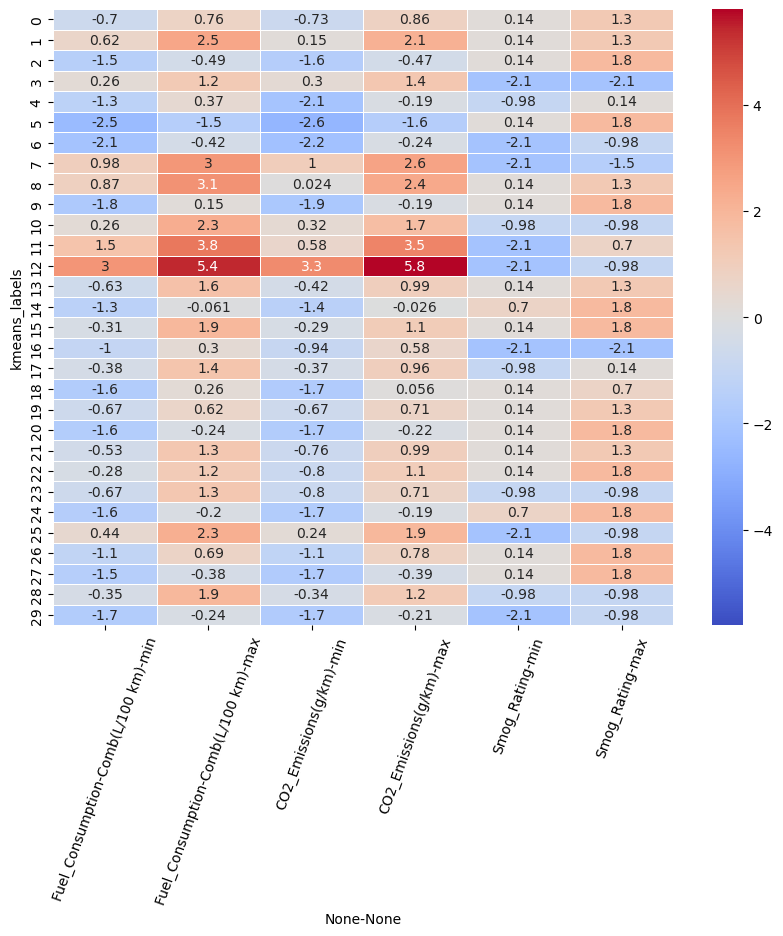

In [602]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(grp_by_kmeansLabels_stats,vmin = -5.8, annot=True, cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=70)

I can tell that cluster 25, 12, 11, 10, 8, 7, 3 and 1 definitely are clusters containing vehicles that aren't green as their min and max values are greater than 0 and other clusters have smaller values. But of course, since more clusters are needed to properly cluster these, it is not easily distinguishable for other current clusters aren't at greater distances from one another (silhouette). Hence, will do this again in the final sprint to see if distinguishing green vehicle from non green ones will get easier with more clusters as distance among them will be larger and there will be adequate number of clusters.